<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Importacion de las librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Mounted at /content/drive
Datos cargados exitosamente!


# Seleccionar las columnas relevantes

In [ ]:
features = ['Map', 'Team', 'RoundWinner', 'RoundStartingEquipmentValue']
target = 'Survived'

X = data[features]
y = data[target]

# Codificar variables categóricas

In [ ]:
label_encoders = {}
for column in ['Map', 'Team']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


/tmp/ipython-input-5-2219531271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
/tmp/ipython-input-5-2219531271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


# Convertir booleanos a enteros


In [ ]:
X['RoundWinner'] = X['RoundWinner'].map({'False': 0, 'True': 1})


/tmp/ipython-input-8-3250735155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RoundWinner'] = X['RoundWinner'].map({'False': 0, 'True': 1})


## Escalar los valores numéricos

In [ ]:
scaler = MinMaxScaler()
X[['RoundStartingEquipmentValue']] = scaler.fit_transform(X[['RoundStartingEquipmentValue']])


/tmp/ipython-input-9-3918247347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['RoundStartingEquipmentValue']] = scaler.fit_transform(X[['RoundStartingEquipmentValue']])


# Dividir los datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo KNN

In [ ]:
from sklearn.impute import SimpleImputer

# Crear un imputador que rellena NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar e imputar X_train
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Imputar X_test con la misma media
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Evaluar el modelo

In [ ]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f'Precisión en entrenamiento: {train_score:.2f}')
print(f'Precisión en prueba: {test_score:.2f}')

Precisión en entrenamiento: 0.67
Precisión en prueba: 0.66


# Predicciones y métricas


Matriz de Confusión:
[[10580  3636]
 [ 4550  4982]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.70      0.74      0.72     14216
        True       0.58      0.52      0.55      9532

    accuracy                           0.66     23748
   macro avg       0.64      0.63      0.64     23748
weighted avg       0.65      0.66      0.65     23748



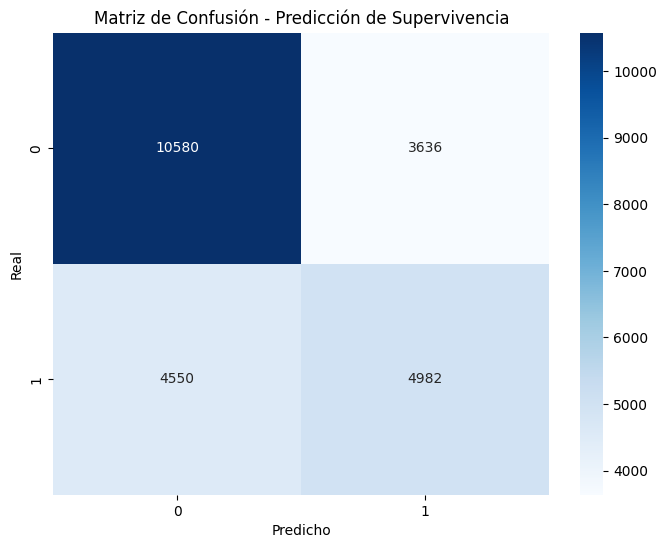

In [ ]:
y_pred = knn.predict(X_test)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Predicción de Supervivencia')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Precisión (Accuracy):
66%

Significa que el modelo acierta en 66 de cada 100 predicciones.

Precisión por clase:
False (no sobrevive): 0.70

True (sobrevive): 0.58
→ El modelo confunde más a los jugadores que sobreviven.

# Encontrar el mejor valor de k

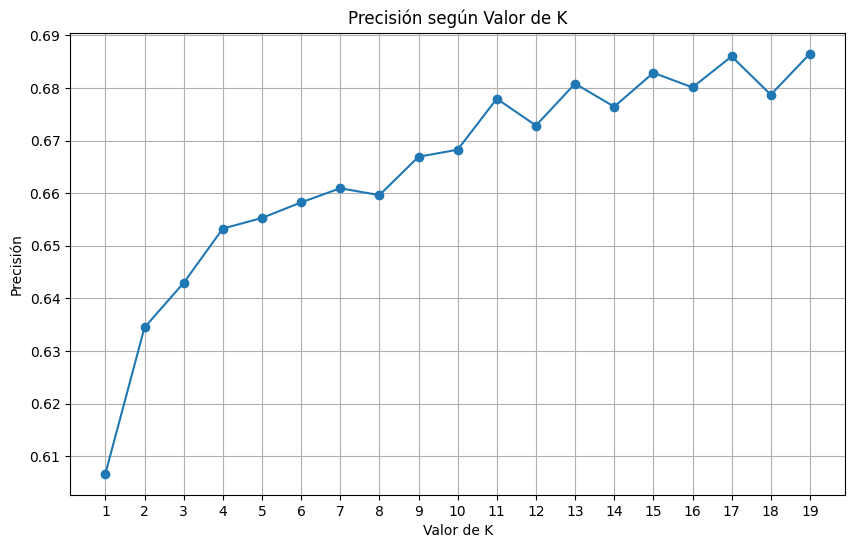

In [ ]:
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    accuracies.append(knn_temp.score(X_test, y_test))

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Precisión según Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid()
plt.show()


# Seleccionar el mejor k

In [ ]:
best_k = k_values[np.argmax(accuracies)]
print(f'\nMejor valor de K: {best_k} con precisión: {max(accuracies):.2f}')


Mejor valor de K: 19 con precisión: 0.69


# Entrenar modelo final con el mejor k

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

# Evaluación final

In [ ]:
final_test_score = final_knn.score(X_test, y_test)
print(f'\nPrecisión final en prueba: {final_test_score:.2f}')


Precisión final en prueba: 0.69


# Ejemplo de predicción

In [ ]:
sample_prediction = final_knn.predict([[0, 1, 1, 0.5]])  # Ejemplo: de_inferno, CounterTerrorist, RoundWinner=True, equipo normalizado
print(f'\nPredicción de ejemplo: {"Sobrevive" if sample_prediction[0] else "No sobrevive"}')


Predicción de ejemplo: No sobrevive


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
